# Week 3: Classification

## Sources
- [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
- [A Quick Introduction to K-Nearest Neighbors Algorithm](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7s)
- [Logistic Regression (for dummies)](https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/)
- [Decision Trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)

## Rob Pike's 5 Rules of Programming

These are the rules to know by heart when you are starting to write any code:

1. You can't tell where a program is going to spend its time. Bottlenecks occur in surprising places, so don't try to second guess and put in a speed hack until you've proven that's where the bottleneck is.
1. Measure. Don't tune for speed until you've measured, and even then don't unless one part of the code overwhelms the rest.
1. Fancy algorithms are slow when n is small, and n is usually small. Fancy algorithms have big constants. Until you know that n is frequently going to be big, don't get fancy. (Even if n does get big, use Rule 2 first.)
1. Fancy algorithms are buggier than simple ones, and they're much harder to implement. Use simple algorithms as well as simple data structures.
1. Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming.

## Classification and k-fold Cross-Validation

In this week's assignment, we will implement k-nearest neighborhood algorithm with an Euclidean metric and test it against other classification algorithms.

We will start with importing the libraries we are going to use. I recommend that you get familiar with [scikit-learn](https://scikit-learn.org/).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Set Seaborn context and style.
sns.set_style('whitegrid')
sns.set_context('talk')

This time, we are going to make our own dataset for classification. After running the function below, you should see two blobs.

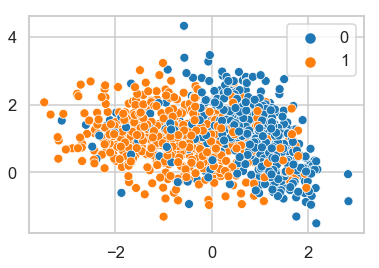

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, flip_y=0.2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

### Q1. kNN works with a distance function, implement a function that takes two data points and gives [the euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between them.

In [4]:
import math

def distance(point1, point2):
    """Return the distance between two points in N dimensional space."""
    result = math.sqrt(sum((point1 - point2)**2))
    return result

#### Testing:

In [27]:
print("The distance is: {0:.3f}".format(distance(np.array([10,20]), np.array([20,100]))))

The distance is: 80.623


### Q2. Select a random point in the possible range for the dataset created above and calculate its distance to all the points in the dataset and put it in an array.

In [6]:
import random
from random import choice
array = []
X1_id = random.choice(range(len(X)))
X1 = X[X1_id]

for i in range(len(X)):
    d = distance(X1,X[i])
    array.append(d)
    
np_array = np.array(array)
print(np_array)

[4.23370144 3.9797591  2.65112896 3.49451071 2.18590969 3.74441915
 0.23639877 5.2029606  2.16027527 1.97528612 4.3834145  3.07634645
 0.74815761 1.55095713 1.74991344 1.38754744 0.9528381  0.18173933
 2.78736676 0.80580259 1.94795916 0.87588435 2.63464082 2.16207677
 3.49628634 1.60776901 2.02173084 2.37539392 2.94554735 2.38769423
 1.60470933 2.43033637 3.09999934 1.89721815 3.66467855 2.03835806
 2.666355   1.71597461 2.65641113 3.22867586 1.75405103 3.54730762
 2.43437903 2.90421901 2.45492926 0.49104945 3.4248754  2.65789758
 2.18697925 0.43947419 3.15643896 0.74614207 3.06227027 1.44313089
 1.82842129 0.40056286 4.14196487 2.15892809 2.92160039 1.37108036
 1.65504662 1.87645076 3.08346877 1.88355598 2.23645389 3.38337756
 4.24136728 2.949641   3.43150439 4.06787257 2.37038814 1.58350679
 3.09194348 2.17656376 3.182842   1.78151843 0.91824098 4.24926744
 0.54645727 1.95872493 1.3702     1.54771841 1.86291098 2.53689015
 3.32119236 0.29322462 1.87035789 1.66286062 1.61359209 2.7140

### Q3. Find the indices of the closest 5 data points and their class.

In [7]:
sort_distance = np.argsort(np_array)
top5_closest_points = sort_distance[1:6] # ignore index 0 since it is the same point
points_classes = y[top5_closest_points]

print("The cloest 5 data points of indices are {}".format(top5_closest_points))
print("The cloest 5 data points of their classes are {}".format(points_classes))

The cloest 5 data points of indices are [106 673 481 308 380]
The cloest 5 data points of their classes are [0 0 1 0 1]


### Q4. Find the class that has maximum number of votes.

In [8]:
class_1 = 0
class_0 = 0

for classes in points_classes:

    if classes == 1:
        class_1 = class_1 + 1 
    else:
        class_0 = class_0 + 1 


if class_1 > class_0:
    print("Class 1 has more votes")
    
else:
    print("Class 0 has more votes")


Class 0 has more votes


### Q5. Combine above to a function, where it takes a set of points and a point and returns the class that has the maximum number of votes from k of its closest neighbors.

In [9]:
def get_vote(X, y, point, k):
    
    array = []

    for i in range(len(X)):
        d = distance(point, X[i])
        array.append(d)
    np_array = np.array(array)
        
    sort_distance = np.argsort(np_array)
    topk_closest_points = sort_distance[1:k+1]
    
    points_classes = y[topk_closest_points]

    
    class_1 = 0
    class_0 = 0

    for classes in points_classes:

        if classes == 1:
            class_1 = class_1 + 1 
        else:
            class_0 = class_0 + 1 


    if class_1 > class_0:
        return 1
    else:
        return 0


### Q6. Split your dataset into train (65%) and test (35%) datasets with stratification. Get the voted results for your test dataset for $k = 3$.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

class_votes = []
for i in X_test: 
    
    class_value = get_vote(X_train, y_train, i, 3)
    
    class_votes.append(class_value)

print('The voted results for the test dataset are:', class_votes)

The voted results for the test dataset are: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0

### Q7. Implement a function that measures [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification), given predicted values and true values. 

In [11]:
def accuracy_score(y_pred, y_true):

    accuracy = 0
    
    for i in range(len(y_pred)):
    
        accuracy = accuracy + 1 - abs(y_pred[i] - y_true[i])
        
    accuracy = accuracy / len(y_pred)
        
    return accuracy

### Q8. Plot accuracy of kNN model on the test dataset against odd values of k between 1 and 21.

## Cross-Validation
To have a proper test, we need to randomly split the dataset couple times and repeat the test. If you have a working a get_vote function, the helper function below should work.

In [12]:
def kNN(X_train, y_train, X_test, k):
    
    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)

    for i in range(n_test):
    
        y_pred[i] = get_vote(X_train, y_train, X_test[i, :], k)
        
    return y_pred

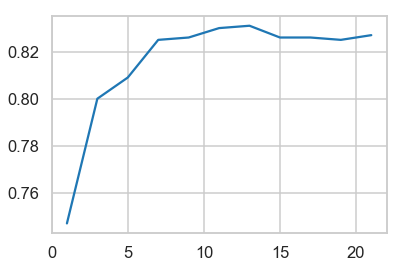

In [13]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
ks = [i for i in range(22) if i % 2]
acs = []

for k in ks:
    
    acs_k = []
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_pred = kNN(X_train, y_train, X_test, k)
        acs_k.append(accuracy_score(y_pred, y_test))
    
    acs.append(np.mean(acs_k))
    
sns.lineplot(ks, acs)
    

The best k value for the **KNN** might be 13 or 14

### Q9. Fit a logistic regression model on the dataset with 65-35 split and calculate the accuracy score. You can use scikit-learn [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class with defaults.

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

logmodel = LogisticRegression().fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print("The accurancy of fitting into logistic regression model is:", 
      accuracy_score(y_pred, y_test))

The accurancy of fitting into logistic regression model is: 0.8


### Q10. Fit a decision tree model on the dataset with 65-35 split and calculate the accuracy score. You can use scikit-learn [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class with defaults.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DecisionTreemodel = DecisionTreeClassifier()
DecisionTreemodel.fit(X_train, y_train)
y_pred = DecisionTreemodel.predict(X_test)

print("The accurancy of fitting into decision tree model is: {0:.3f}".format( 
      accuracy_score(y_pred, y_test)))

The accurancy of fitting into decision tree model is: 0.765


### Q11. Run 5-fold cross-validation on 5NN, LR and Decision Tree models. Compare accuracies and discuss why the results differ.

#### KNN model

In [25]:
skf = StratifiedKFold(n_splits=5)

acs_k = []
for train_index, test_index in skf.split(X, y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
    y_pred = kNN(X_train, y_train, X_test, 5)
    acs_k.append(accuracy_score(y_pred, y_test))
    
print("The accurancy of fitting into knn model by cross validation is: {0:.3f}".format(
      np.mean(acs_k)))

The accurancy of fitting into knn model by cross validation is: 0.809


#### Logistic regression model

In [20]:
skf = StratifiedKFold(n_splits=5)

acs_k = []
for train_index, test_index in skf.split(X, y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
    y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
    acs_k.append(accuracy_score(y_pred, y_test))
    
print("The accurancy of fitting into logistic regression model by cross validation is:",
      np.mean(acs_k))


The accurancy of fitting into logistic regression model by cross validation is: 0.828


#### Decision tree model 

In [21]:
skf = StratifiedKFold(n_splits=5)

acs_k = []
for train_index, test_index in skf.split(X, y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
    y_pred = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
    acs_k.append(accuracy_score(y_pred, y_test))
    
print("The accurancy of fitting into decision tree model by cross validation is:", 
      np.mean(acs_k))

The accurancy of fitting into decision tree model by cross validation is: 0.724


The cross validation is used to have better confidence in our prediction accuracy. For example, if we split our data into train and test sets and get an accuracy, it is only for that arrangement. Performing K-folds cross-validation loops through all the data and gets classification accuracy for each time, they are averaged to give you a number more representative of overall accuracy.

Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. In our example where the two classes are closely separated by a linear boundary, we see that **Logistic regression model** can better capture the division. However, when the two classes are separated by a decidedly non-linear boundary, we see that **trees** can better capture the division, leading to superior classification performance. In our case, the plot doesn't show it clearly.

I would conclude that the **Logistic regression model** is slightly a better choice than **KNN model** and **Decision tree model** for this particular test.